# Student's t-Distribution


## Learning Objectives

After studying this notebook, attending class, completing the home activities, and asking questions, you should be able to:
* Calculate any size confidence interval (95%, 99%, etc.) using z- or t-distribution
 * Explain why the t-distribution is important. Relate this back to the CLT
 * Check for the assumption required to apply the t-distribution

In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt

## Student's t-Distribution

**Further Reading**: §5.3 in Navidi (2015)


### Main Idea

What happens if the sample size is *small* and we do not know $\sigma$? Two complications arise:
* Cannot invoke central limit theorem
* Need to account for errors when estimating $\sigma$ (population standard deviation) using $s$ (sample standard deviation)

**Solution: Student's t-distribution**

**History Side Tangent**

Published in 1908 by William Sealy Goshet under the pseudonym *Student*.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/William_Sealy_Gosset.jpg/170px-William_Sealy_Gosset.jpg)
![](https://upload.wikimedia.org/wikipedia/en/thumb/f/fe/Guinness-original-logo.svg/220px-Guinness-original-logo.svg.png)

### Degrees of Freedom and Visualization

$\nu$ is the degrees of freedom:
* Student's t-distribution converges to the Gaussian distribution (normal distribution shown in last notebook) as $\nu \rightarrow \infty$
* $\nu$ is often $n$ - 1. We lose 1 degree of freedom to estimate standard deviation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/960px-Student_t_pdf.svg.png" alt="drawing" width="400"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Student_t_cdf.svg/960px-Student_t_cdf.svg.png" alt="drawing" width="400"/>

## Comparison of $z^*$ and $t^*$

In [2]:
n = 5
print("Consider n =",n)

# calculate zstar
# argument 1: confidence level
zstar95 = stats.norm.interval(0.95)
print("\nz-star for 95% interval:",zstar95)

# calculate tstar
# argument 1: confidence level
# argument 2: degrees of freedom
tstar95 = stats.t.interval(0.95,n-1)
print("\nt-star for 95% interval:",tstar95)

# percent error
print("\nPercent error using z instead of t:",abs((1 - zstar95[0]/tstar95[0]))*100,"%")

Consider n = 5

z-star for 95% interval: (-1.959963984540054, 1.959963984540054)

t-star for 95% interval: (-2.7764451051977987, 2.7764451051977987)

Percent error using z instead of t: 29.407428914377086 %


## Catalyst Example Revisited


<div class="admonition note"> 
<b>Class Discussion</b>: Below is the code from the Confidence Intervals notebook.  How would we modify our code to calculate a t-interval (instead of a z-interval)?
</div>

In [3]:
# catalyst example data
lifetime = [3.2, 6.8, 4.2, 9.2, 11.2, 3.7, 2.9, 12.6, 6.4, 7.5, 8.6,
            4.5, 3.0, 9.6, 1.5, 4.5, 6.3, 7.2, 8.5, 4.2, 6.3, 3.2, 5.0, 4.9, 6.6]

# Compute the mean and standard deviation
xbar = np.mean(lifetime)
s = np.std(lifetime)

## calculate 95% confidence z-interval
n = len(lifetime)
zstar95 = stats.norm.interval(0.95)
low = xbar + zstar95[0]*s/math.sqrt(n)
high = xbar + zstar95[1]*s/math.sqrt(n)
print("95% confidence z-interval: [",round(low,2),",", round(high,2),"] hours")

## calculate 90% confidence z-interval
n = len(lifetime)
zstar90 = stats.norm.interval(0.9)
low = xbar + zstar90[0]*s/math.sqrt(n)
high = xbar + zstar90[1]*s/math.sqrt(n)
print("90% confidence z-interval: [",round(low,2),",", round(high,2),"] hours")


## calculate 99% confidence z-interval
n = len(lifetime)
zstar99 = stats.norm.interval(0.99)
low = xbar + zstar99[0]*s/math.sqrt(n)
high = xbar + zstar99[1]*s/math.sqrt(n)
print("99% confidence z-interval: [",round(low,2),",", round(high,2),"] hours")

95% confidence z-interval: [ 5.0 , 7.13 ] hours
90% confidence z-interval: [ 5.17 , 6.96 ] hours
99% confidence z-interval: [ 4.66 , 7.46 ] hours


<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Recalculate the confidence intervals using the t-distribution.
</div>

In [4]:
# Add your solution here

95% confidence t-interval: [ 4.94 , 7.19 ] hours
90% confidence t-interval: [ 5.13 , 6.99 ] hours
99% confidence t-interval: [ 4.54 , 7.58 ] hours


## Important Assumptions: Population is Normally Distributed, Samples are Random

Student's t-distribution only applies if the population is **normally distributed** and samples are **random** (i.e., zero covariance). Otherwise, the significance level is not correct, i.e., we will either under- or over-estimate uncertainty.

**How to know/check if the population is normally distributed?**
* **Preferred:** Examine large amounts of historical data or leverage additional knowledge.
* **Practical:** Plot the sample and check for outliers.

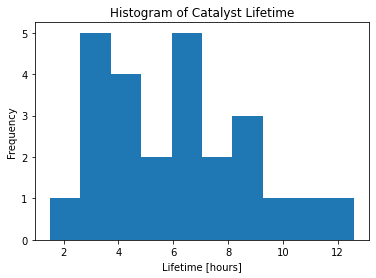

In [5]:
plt.hist(lifetime)
plt.title("Histogram of Catalyst Lifetime")
plt.xlabel("Lifetime [hours]")
plt.ylabel("Frequency")
plt.show()

<div class="admonition note"> 
<b>Class Discussion</b>: Are there outliers in the catalyst lifetime dataset?
</div>

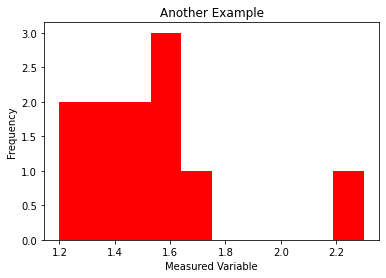

In [6]:
another_example = [1.2, 2.3, 1.5, 1.4, 1.3, 1.6, 1.4, 1.7, 1.6, 1.5, 1.6]
plt.hist(another_example,color="red")
plt.title("Another Example")
plt.xlabel("Measured Variable")
plt.ylabel("Frequency")
plt.show()

<div class="admonition note"> 
<b>Class Discussion</b>: What about this dataset? Does it contain any outliers?
</div>

**Another Example:** Time Series Data.

Below are two plots of yield versus time data for two chemical processes.

![](https://drive.google.com/uc?export=view&id=1izl_-WD7yZk40QA3F9wHeiRd9V6-SMyW)

<div class="admonition note"> 
<b>Class Discussion</b>: Can you use these data to calculate confidence intervals for the average yield of each process using a t-distribution?
</div>